Accuracy: 0.7603485838779956
Predict Heart Disease for ATA Chest Pain Type: 0
Predict Heart Disease for ASY Chest Pain Type: 1


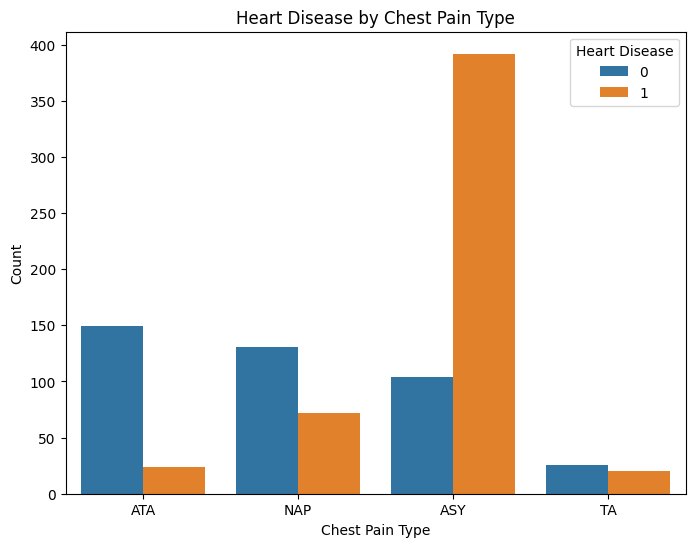

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dataset
d=pd.read_csv("heart.csv")
d.loc[2:9,["ChestPainType","HeartDisease"]] # This line just selects and displays a subset, doesn't modify d

# Convert 'ChestPainType' categorical column to numerical using one-hot encoding
x = pd.get_dummies(d['ChestPainType'], prefix='ChestPainType')
y = d[["HeartDisease"]]

# Model
model = LogisticRegression(solver='liblinear') # Added solver to avoid future warnings
model.fit(x, y.values.ravel()) # .values.ravel() to convert y DataFrame to 1D array

# Accuracy
y_pred = model.predict(x)
acc = accuracy_score(y, y_pred)

print("Accuracy:", acc)

# Create DataFrames with proper column names for prediction
ata_input = pd.DataFrame([[0, 1, 0, 0]], columns=x.columns)
asy_input = pd.DataFrame([[1, 0, 0, 0]], columns=x.columns) # Corrected input for ASY

print("Predict Heart Disease for ATA Chest Pain Type:", model.predict(ata_input)[0])
print("Predict Heart Disease for ASY Chest Pain Type:", model.predict(asy_input)[0])

plt.figure(figsize=(8, 6))
sns.countplot(data=d, x='ChestPainType', hue='HeartDisease')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()